In [1]:
import numpy as np
import scipy.io as sio
import matplotlib.pyplot as plt

In [2]:
data=sio.loadmat('data/bird_small.mat')
data.keys()

dict_keys(['__header__', '__version__', '__globals__', 'A'])

In [3]:
A=data['A']
A.shape

(128, 128, 3)

In [7]:
from skimage import io

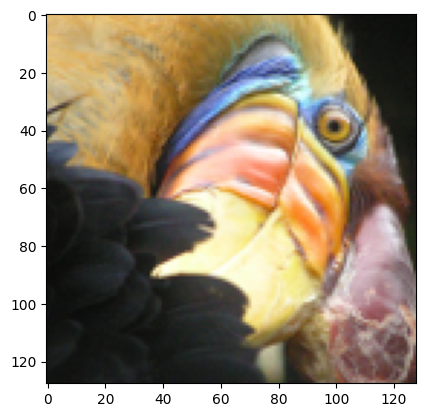

In [8]:
image=io.imread('data/bird_small.png')
plt.imshow(image)

In [9]:
A=A/255
A=A.reshape(-1,3)

In [10]:
def find_centroids(X,centros):
    idx=[]

    for i in range(len(X)):
        #X[i]是(2,) centros是(k,2),自动转换为(k,2)
        dist=np.linalg.norm((X[i]-centros),axis=1)
        id_i=np.argmin(dist)
        idx.append(id_i)

    return np.array(idx)

In [11]:
def update_centros(X,idx,k):
    centros=[]
    for i in range(k):
        centros_i=np.mean(X[idx==i],axis=0)
        centros.append(centros_i)
    return np.array(centros)

In [12]:
def run_kmeans(X,centros,iters):
    k=len(centros)
    centros_all=[]
    centros_all.append(centros)
    centros_i=centros
    
    for i in range(iters):
        idx=find_centroids(X,centros_i)
        centros_i=update_centros(X,idx,k)
        centros_all.append(centros_i)

    return idx,np.array(centros_all)

In [13]:
def plot_data(X,centros_all,idx):
    plt.figure()
    plt.scatter(X[:,0],X[:,1],c=idx,cmap='rainbow')
    plt.plot(centros_all[:,:,0],centros_all[:,:,1],'kx--')

In [14]:
# 生成初始聚类点
def init_centros(X,k):
    index=np.random.choice(len(X),k)
    return X[index]

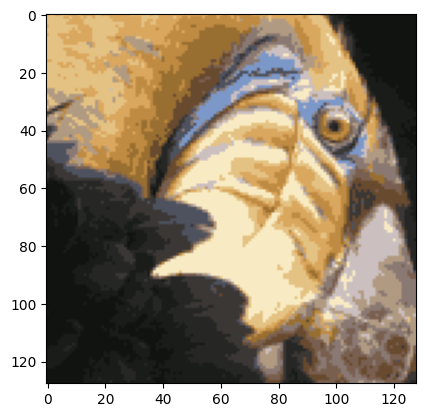

In [15]:
k=16
idx,centros_all=run_kmeans(A,init_centros(A,k=16),iters=20)
centros=centros_all[-1]
im=np.zeros(A.shape)#空白图片
for i in range(k):
    im[idx==i]=centros[i]
im=im.reshape(128,128,3)
plt.imshow(im)